#Análisis Exploratorio de Datos

##Instalación e importación de paquetes y librerias


In [1]:
install.packages("IRkernel")
install.packages("tidyverse")
install.packages("RColorBrewer")
install.packages("corrplot")
install.packages("psych")
install.packages("dplyr")
install.packages("ggplot2")
install.packages("gtools")
install.packages("ggfortify")
install.packages("GGally")
install.packages("readr")
install.packages("readxl")
install.packages("knitr")
install.packages("modelr")
install.packages("scales")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘mnormt’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘gridExtra’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘Rcpp’, ‘plyr’, ‘reshape’


Installing package int

In [2]:
library(IRkernel)
library(tidyverse)
library(RColorBrewer)
library(corrplot)
library(psych)
library(dplyr)
library(ggplot2)
library(gtools)
library(ggfortify)
library(GGally)
library(readr)
library(readxl)
library(knitr)
library(modelr)
library(scales)
install.packages("conflicted")
library(conflicted)
conflict_prefer("filter", "dplyr")
conflict_prefer("lag", "dplyr")



── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
corrplot 0.92 loaded


Attaching package: ‘psych’


The following objects are masked from ‘package:ggplot2’:

    %+%, alpha



Attaching package: ‘gtools’


The following object is masked from ‘package:psych’:

    logit


Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2


Attaching package: ‘modelr’


The following object is masked from ‘package:gtools’:

    permute



Attaching package: ‘scales’


The following objects are masked from ‘p

##Ames Housing Raw Data

In [3]:
# URL del archivo CSV
url <- "https://raw.githubusercontent.com/FerMarz/ames-housing-2023/main/data/AmesHousing_raw_data.csv"

# Leer el archivo CSV
df <- read.csv(url)

# Mostrando las primeras filas
head(df)

,Order,PID,MS.SubClass,MS.Zoning,Lot.Frontage,Lot.Area,Street,Alley,Lot.Shape,Land.Contour,⋯,Pool.Area,Pool.QC,Fence,Misc.Feature,Misc.Val,Mo.Sold,Yr.Sold,Sale.Type,Sale.Condition,SalePrice
,<int>,<int>,<int>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,⋯,<int>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<chr>,<chr>,<int>
1,1,526301100,20,RL,141,31770,Pave,NA,IR1,Lvl,⋯,0,NA,NA,NA,0,5,2010,WD,Normal,215000
2,2,526350040,20,RH,80,11622,Pave,NA,Reg,Lvl,⋯,0,NA,MnPrv,NA,0,6,2010,WD,Normal,105000
3,3,526351010,20,RL,81,14267,Pave,NA,IR1,Lvl,⋯,0,NA,NA,Gar2,12500,6,2010,WD,Normal,172000
4,4,526353030,20,RL,93,11160,Pave,NA,Reg,Lvl,⋯,0,NA,NA,NA,0,4,2010,WD,Normal,244000
5,5,527105010,60,RL,74,13830,Pave,NA,IR1,Lvl,⋯,0,NA,MnPrv,NA,0,3,2010,WD,Normal,189900
6,6,527105030,60,RL,78,9978,Pave,NA,IR1,Lvl,⋯,0,NA,NA,NA,0,6,2010,WD,Normal,195500


#Analisis de la base

In [4]:
#Desactivar notacion cientifica
options(scipen = 100)

# Ver datos faltantes
na_count <-sapply(df, function(df) sum(length(which(is.na(df)))))
na_count

Order             PID     MS.SubClass       MS.Zoning    Lot.Frontage 
              0               0               0               0             490 
       Lot.Area          Street           Alley       Lot.Shape    Land.Contour 
              0               0            2732               0               0 
      Utilities      Lot.Config      Land.Slope    Neighborhood     Condition.1 
              0               0               0               0               0 
    Condition.2       Bldg.Type     House.Style    Overall.Qual    Overall.Cond 
              0               0               0               0               0 
     Year.Built  Year.Remod.Add      Roof.Style       Roof.Matl    Exterior.1st 
              0               0               0               0               0 
   Exterior.2nd    Mas.Vnr.Type    Mas.Vnr.Area      Exter.Qual      Exter.Cond 
              0               0              23               0               0 
     Foundation       Bsmt.Qual       Bsmt.Cond   Bsmt.Exposure  BsmtFin.Type.1 
              0              79              79              79              79 
   BsmtFin.SF.1  BsmtFin.Type.2    BsmtFin.SF.2     Bsmt.Unf.SF   Total.Bsmt.SF 
              1              79               1               1               1 
        Heating      Heating.QC     Central.Air      Electrical     X1st.Flr.SF 
              0               0               0               0               0 
    X2nd.Flr.SF Low.Qual.Fin.SF     Gr.Liv.Area  Bsmt.Full.Bath  Bsmt.Half.Bath 
              0               0               0               2               2 
      Full.Bath       Half.Bath   Bedroom.AbvGr   Kitchen.AbvGr    Kitchen.Qual 
              0               0               0               0               0 
  TotRms.AbvGrd      Functional      Fireplaces    Fireplace.Qu     Garage.Type 
              0               0               0            1422             157 
  Garage.Yr.Blt   Garage.Finish     Garage.Cars     Garage.Area     Garage.Qual 
            159             157               1               1             158 
    Garage.Cond     Paved.Drive    Wood.Deck.SF   Open.Porch.SF  Enclosed.Porch 
            158               0               0               0               0 
    X3Ssn.Porch    Screen.Porch       Pool.Area         Pool.QC           Fence 
              0               0               0            2917            2358 
   Misc.Feature        Misc.Val         Mo.Sold         Yr.Sold       Sale.Type 
           2824               0               0               0               0 
 Sale.Condition       SalePrice 
              0               0

In [5]:
summary(df)

     Order             PID              MS.SubClass      MS.Zoning        
 Min.   :   1.0   Min.   : 526301100   Min.   : 20.00   Length:2930       
 1st Qu.: 733.2   1st Qu.: 528477022   1st Qu.: 20.00   Class :character  
 Median :1465.5   Median : 535453620   Median : 50.00   Mode  :character  
 Mean   :1465.5   Mean   : 714464497   Mean   : 57.39                     
 3rd Qu.:2197.8   3rd Qu.: 907181098   3rd Qu.: 70.00                     
 Max.   :2930.0   Max.   :1007100110   Max.   :190.00                     
                                                                          
  Lot.Frontage       Lot.Area         Street             Alley          
 Min.   : 21.00   Min.   :  1300   Length:2930        Length:2930       
 1st Qu.: 58.00   1st Qu.:  7440   Class :character   Class :character  
 Median : 68.00   Median :  9436   Mode  :character   Mode  :character  
 Mean   : 69.22   Mean   : 10148                                        
 3rd Qu.: 80.00   3rd Qu.: 11555   

#Cantidad de columnas y tipos de datos

In [6]:
# Cantidad de columnas e instancias
num_columns <- ncol(df)
num_instances <- nrow(df)
cat("Cantidad de columnas:", num_columns, "\n")
cat("Cantidad de instancias:", num_instances, "\n")

# Tipo de dato de cada columna
data_types <- sapply(df, class)
print(data_types)


Cantidad de columnas: 82 
Cantidad de instancias: 2930 
          Order             PID     MS.SubClass       MS.Zoning    Lot.Frontage 
      "integer"       "integer"       "integer"     "character"       "integer" 
       Lot.Area          Street           Alley       Lot.Shape    Land.Contour 
      "integer"     "character"     "character"     "character"     "character" 
      Utilities      Lot.Config      Land.Slope    Neighborhood     Condition.1 
    "character"     "character"     "character"     "character"     "character" 
    Condition.2       Bldg.Type     House.Style    Overall.Qual    Overall.Cond 
    "character"     "character"     "character"       "integer"       "integer" 
     Year.Built  Year.Remod.Add      Roof.Style       Roof.Matl    Exterior.1st 
      "integer"       "integer"     "character"     "character"     "character" 
   Exterior.2nd    Mas.Vnr.Type    Mas.Vnr.Area      Exter.Qual      Exter.Cond 
    "character"     "character"       "integer"     "

In [28]:
# Cantidad de columnas por tipo de dato
columns_by_type <- table(sapply(df, class))
print(columns_by_type)

#Creacion de dataFrame para valores numericos
numeric = df %>% select(where(is.numeric))


character   integer 
       43        39 


Saving 6.67 x 6.67 in image


ERROR: ignored

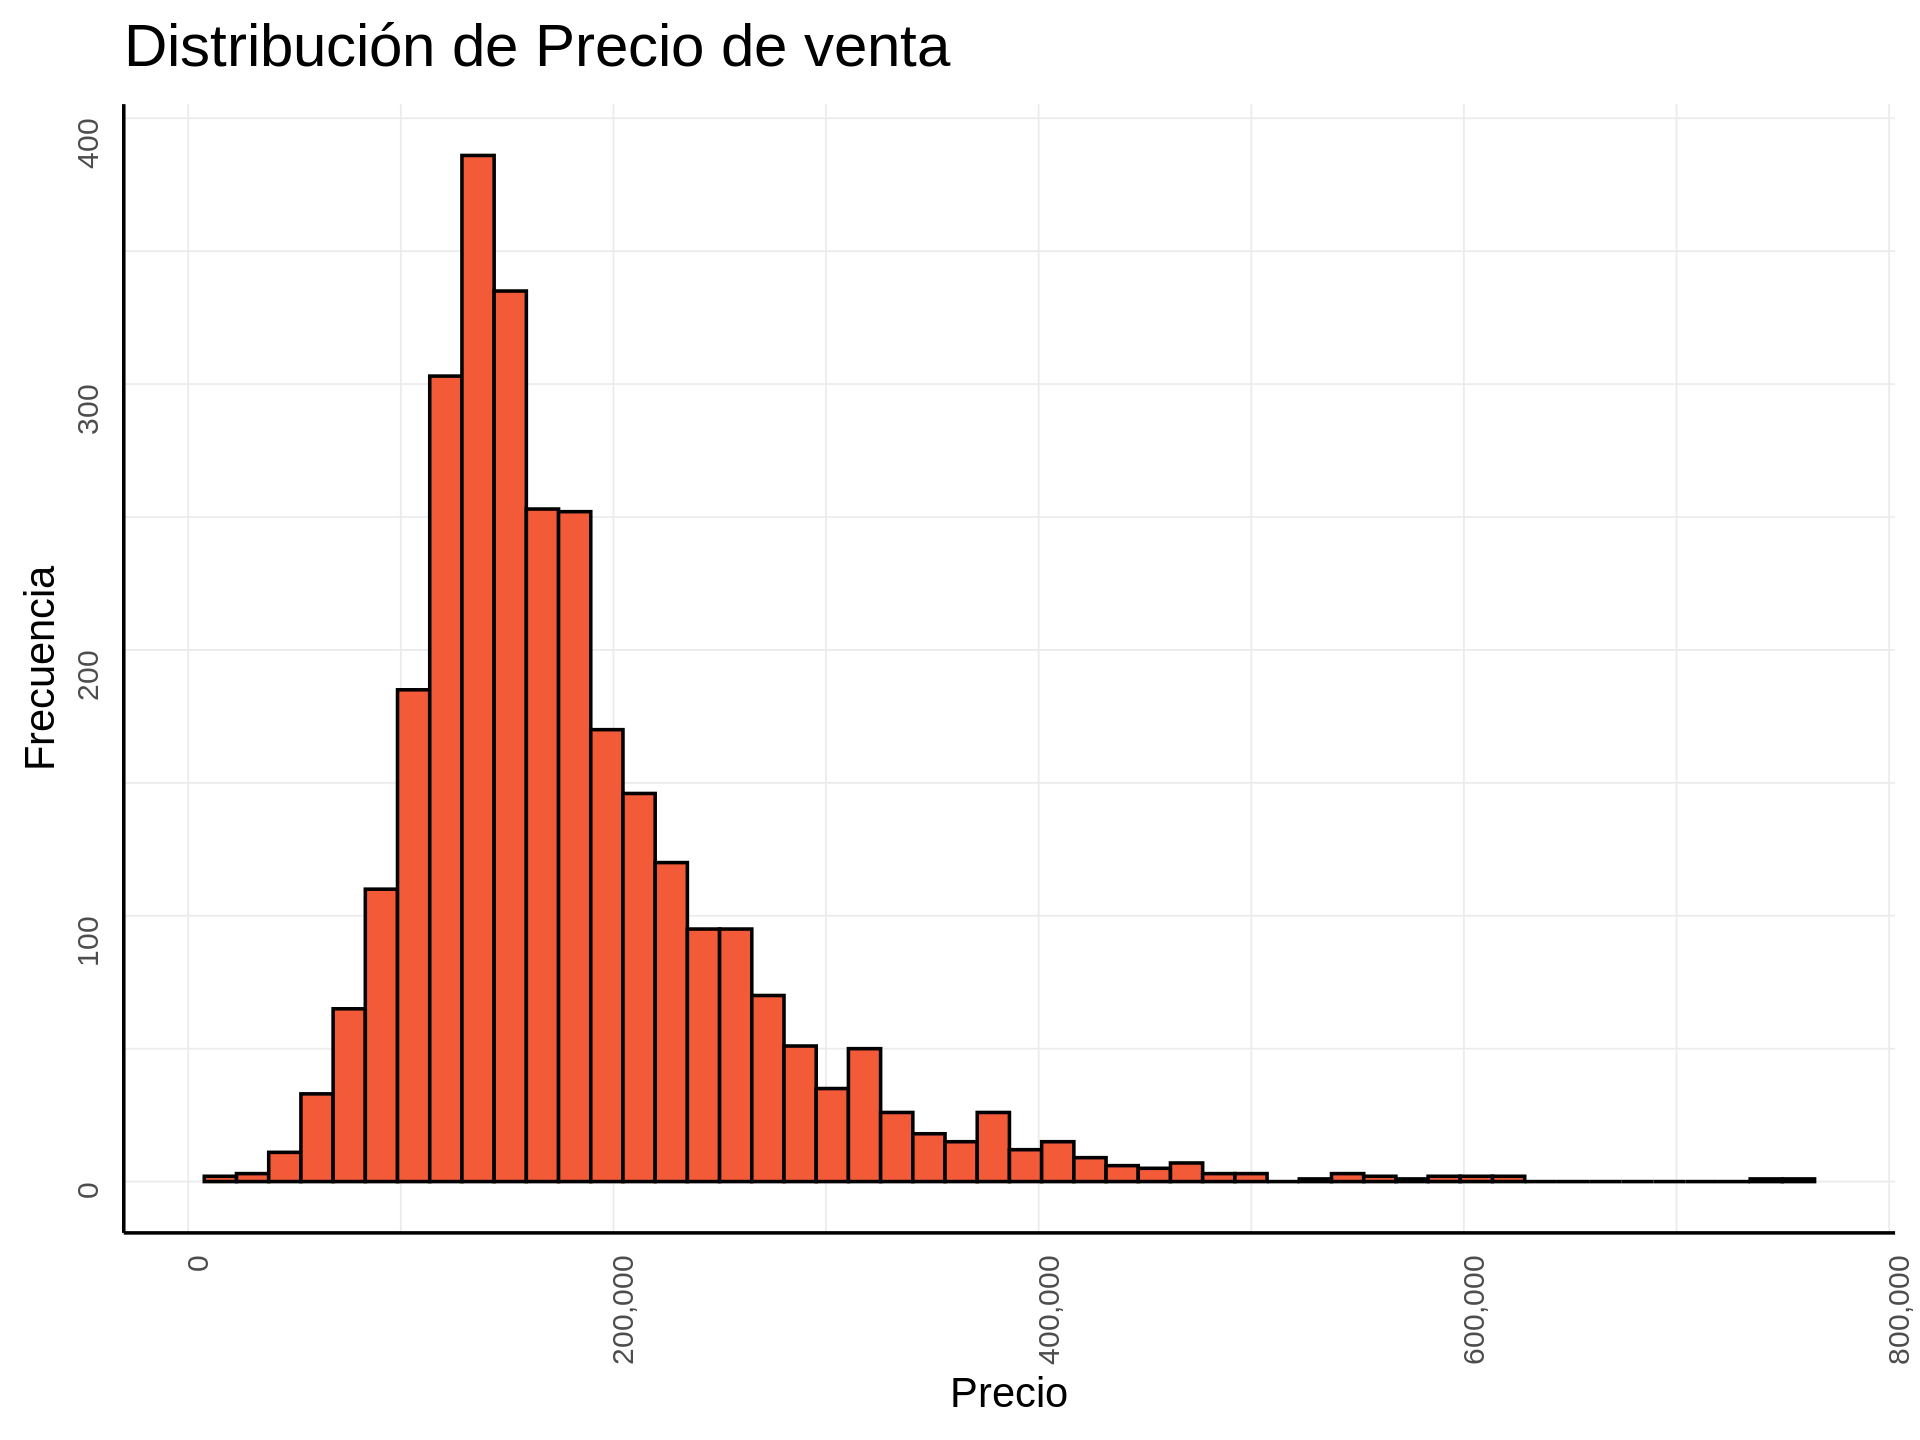

In [29]:
# Establecer DPI
dpi <- 300
options(repr.plot.width = 16, repr.plot.height = 12)
# Crear el histograma con ggplot2
ggplot(df, aes(x = SalePrice)) +
  geom_histogram(color = "black", fill = "#F25A38", bins = 50, size = 1) +  # Grosor de las líneas del histograma
  scale_x_continuous(labels = scales::comma) +  # Utilizar scales::comma para separadores de miles
  labs(title = "Distribución de Precio de venta", x = "Precio", y = "Frecuencia") +  # Cambiar nombres de etiquetas y título
  theme_minimal(base_size = 30) +  # Tamaño de títulos
  theme(axis.title.x = element_text(size = 25),  # Tamaño del título del eje x
        axis.title.y = element_text(size = 25),  # Tamaño del título del eje y
        axis.text = element_text(size = 18, angle = 90, vjust = 0.5, hjust=1),  # Tamaño del texto de los ejes
        axis.line = element_line(size = 1),  # Grosor de las líneas de los ejes
        panel.grid.major = element_line(size = 0.5),  # Grosor de las líneas de la cuadrícula mayor
        panel.grid.minor = element_line(size = 0.5))  # Grosor de las líneas de la cuadrícula menor

# Guardar el gráfico en un archivo PNG con el DPI especificado
ggsave("histograma_saleprice.png", dpi = dpi, bg = "white", gr)


#Cantidad de datos faltantes por columnas

In [30]:
# Contar la cantidad de datos faltantes en cada columna
missing_data_count <- colSums(is.na(df))

# Filtrar y mostrar solo las columnas que tienen datos faltantes
missing_data_count <- missing_data_count[missing_data_count > 0]

print("Cantidad de datos faltantes por columna:")
print(missing_data_count)

[1] "Cantidad de datos faltantes por columna:"
  Lot.Frontage          Alley   Mas.Vnr.Area      Bsmt.Qual      Bsmt.Cond 
           490           2732             23             79             79 
 Bsmt.Exposure BsmtFin.Type.1   BsmtFin.SF.1 BsmtFin.Type.2   BsmtFin.SF.2 
            79             79              1             79              1 
   Bsmt.Unf.SF  Total.Bsmt.SF Bsmt.Full.Bath Bsmt.Half.Bath   Fireplace.Qu 
             1              1              2              2           1422 
   Garage.Type  Garage.Yr.Blt  Garage.Finish    Garage.Cars    Garage.Area 
           157            159            157              1              1 
   Garage.Qual    Garage.Cond        Pool.QC          Fence   Misc.Feature 
           158            158           2917           2358           2824 


#Relacion entre variables mas correlacionadas

Saving 6.67 x 6.67 in image


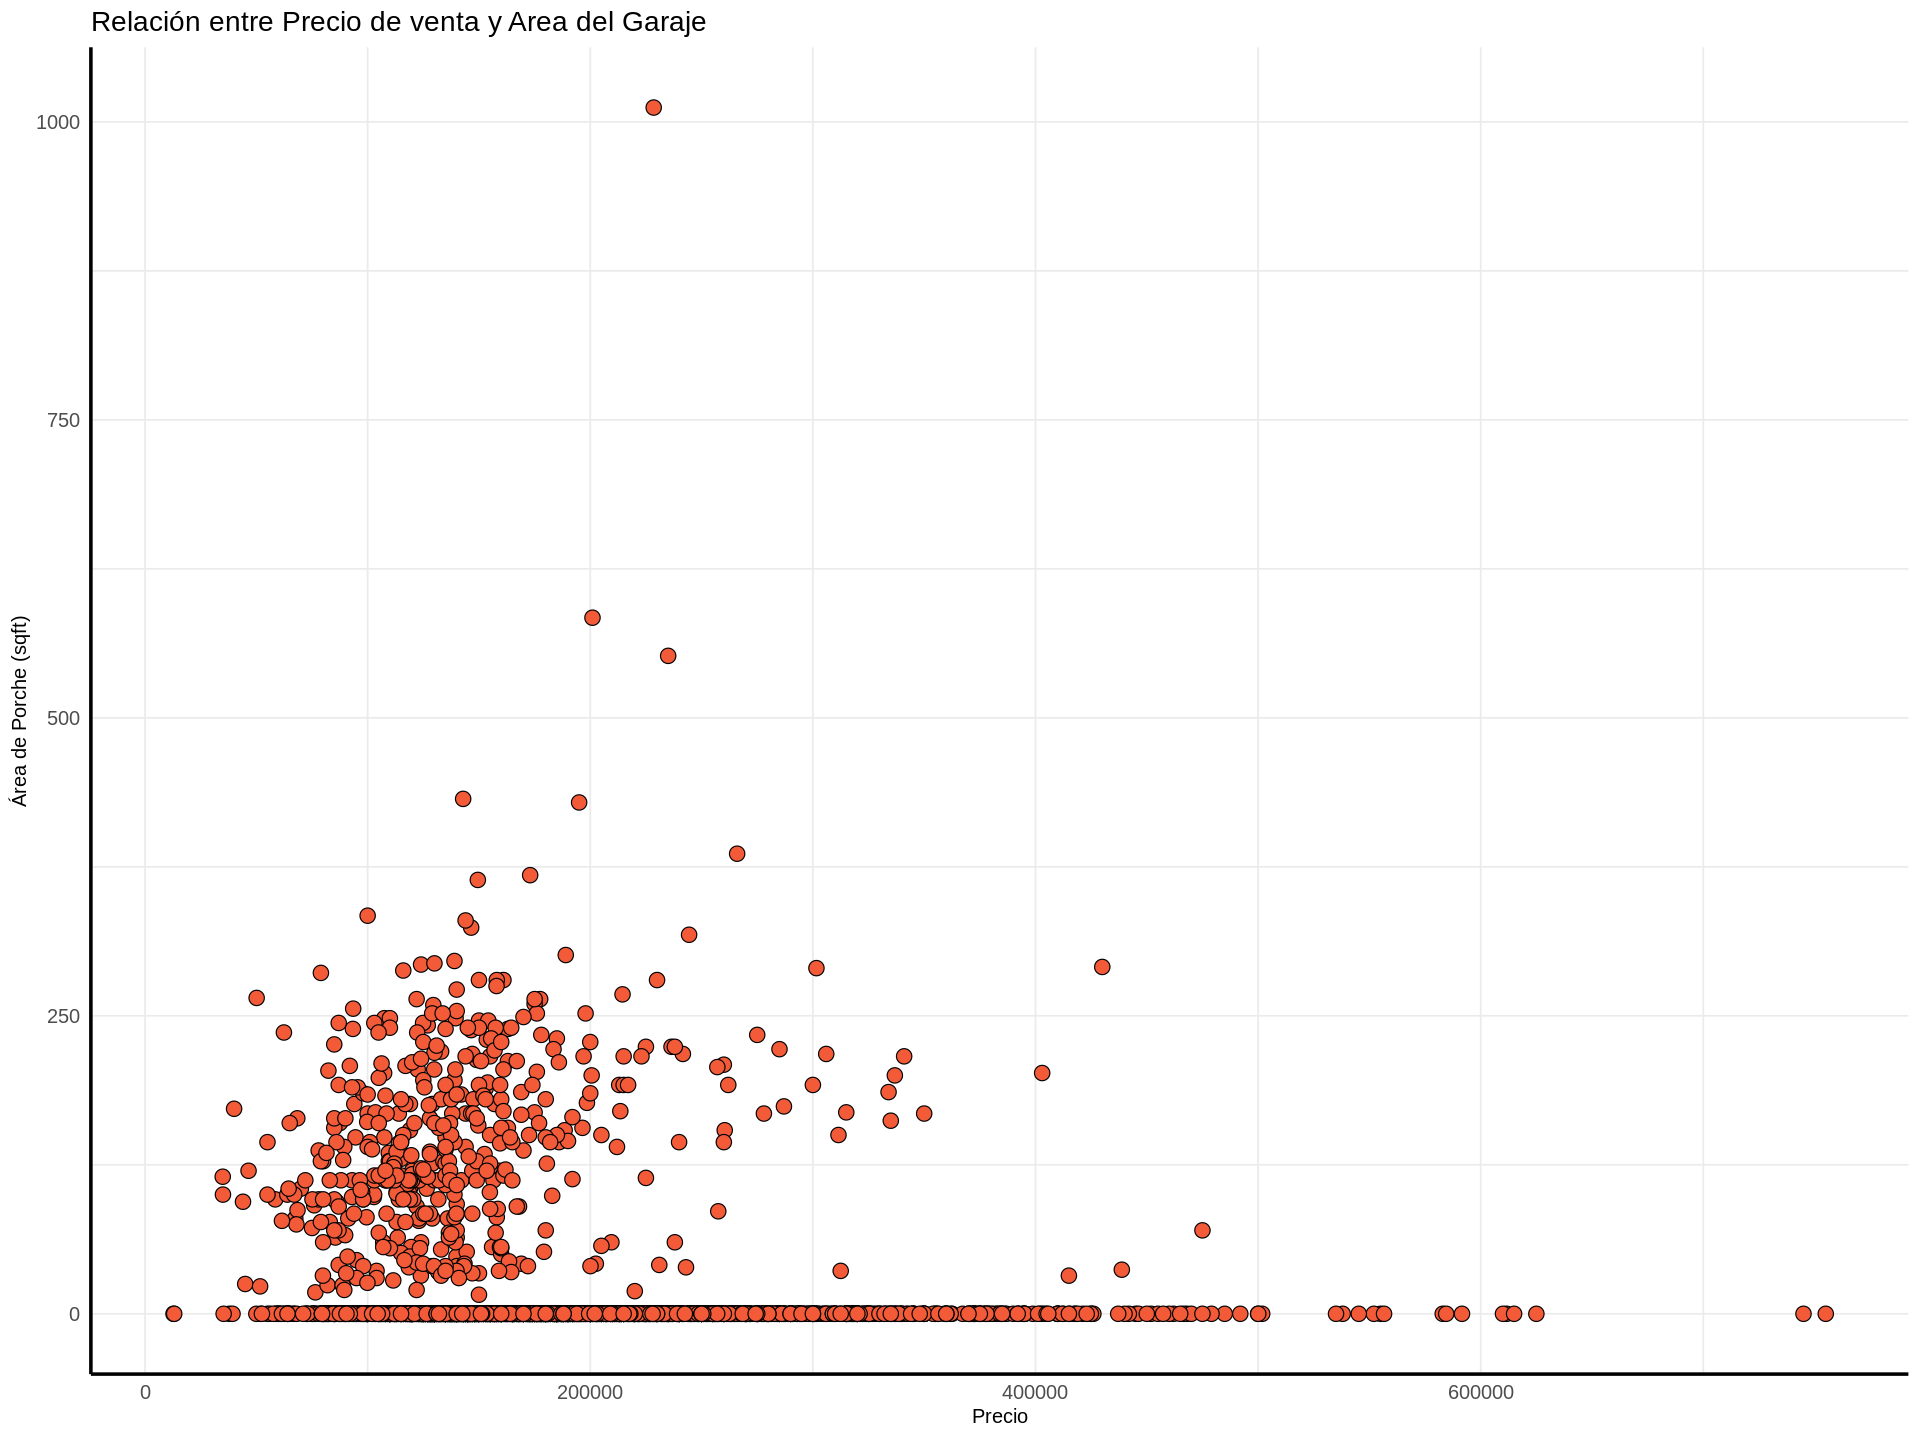

In [31]:
# Establecer DPI
dpi <- 300

# Crear el gráfico con ggplot2
mi_grafico <- ggplot(df, aes(x = SalePrice, y = Enclosed.Porch)) +
  geom_point(shape = 21, fill = "#F25A38", size = 4) +  # Usar forma 21 (círculo con borde) y tamaño 4
  labs(x = "Precio", y = "Área de Porche (sqft)", title = "Relación entre Precio de venta y Area del Garaje") +  # Cambiar nombres de etiquetas y título
  theme_minimal(base_size = 14) +  # Tamaño de títulos
  theme(axis.title.x = element_text(size = 12),  # Tamaño del título del eje x
        axis.title.y = element_text(size = 12),  # Tamaño del título del eje y
        axis.text = element_text(size = 12),  # Tamaño del texto de los ejes
        axis.line = element_line(size = 1),  # Grosor de las líneas de los ejes
        panel.grid.major = element_line(size = 0.5),  # Grosor de las líneas de la cuadrícula mayor
        panel.grid.minor = element_line(size = 0.5))  # Grosor de las líneas de la cuadrícula menor

# Guardar el gráfico en un archivo PNG con el DPI especificado
ggsave("mi_grafico.png", plot = mi_grafico, bg = "white", dpi = dpi)
print(mi_grafico)

#Coeficientes de correlación

In [32]:
#Coeficiente de correlación entre SalePrice, OverallQuality, 2nd FLoor SF, GR Liv Area
print("Correlación SalesPrice / Overall Qual")
cor(df$SalePrice, df$Overall.Qual)
print("Correlación SalesPrice / 2nd Floor SF")
cor(df$SalePrice, df$X2nd.Flr.SF)
print("Correlación SalesPrice / Gr Liv Area")
cor(df$SalePrice, df$Gr.Liv.Area)

[1] "Correlación SalesPrice / Overall Qual"


[1] 0.7992618

[1] "Correlación SalesPrice / 2nd Floor SF"


[1] 0.2693734

[1] "Correlación SalesPrice / Gr Liv Area"


[1] 0.7067799

#Grafico de disperción

`geom_smooth()` using formula = 'y ~ x'


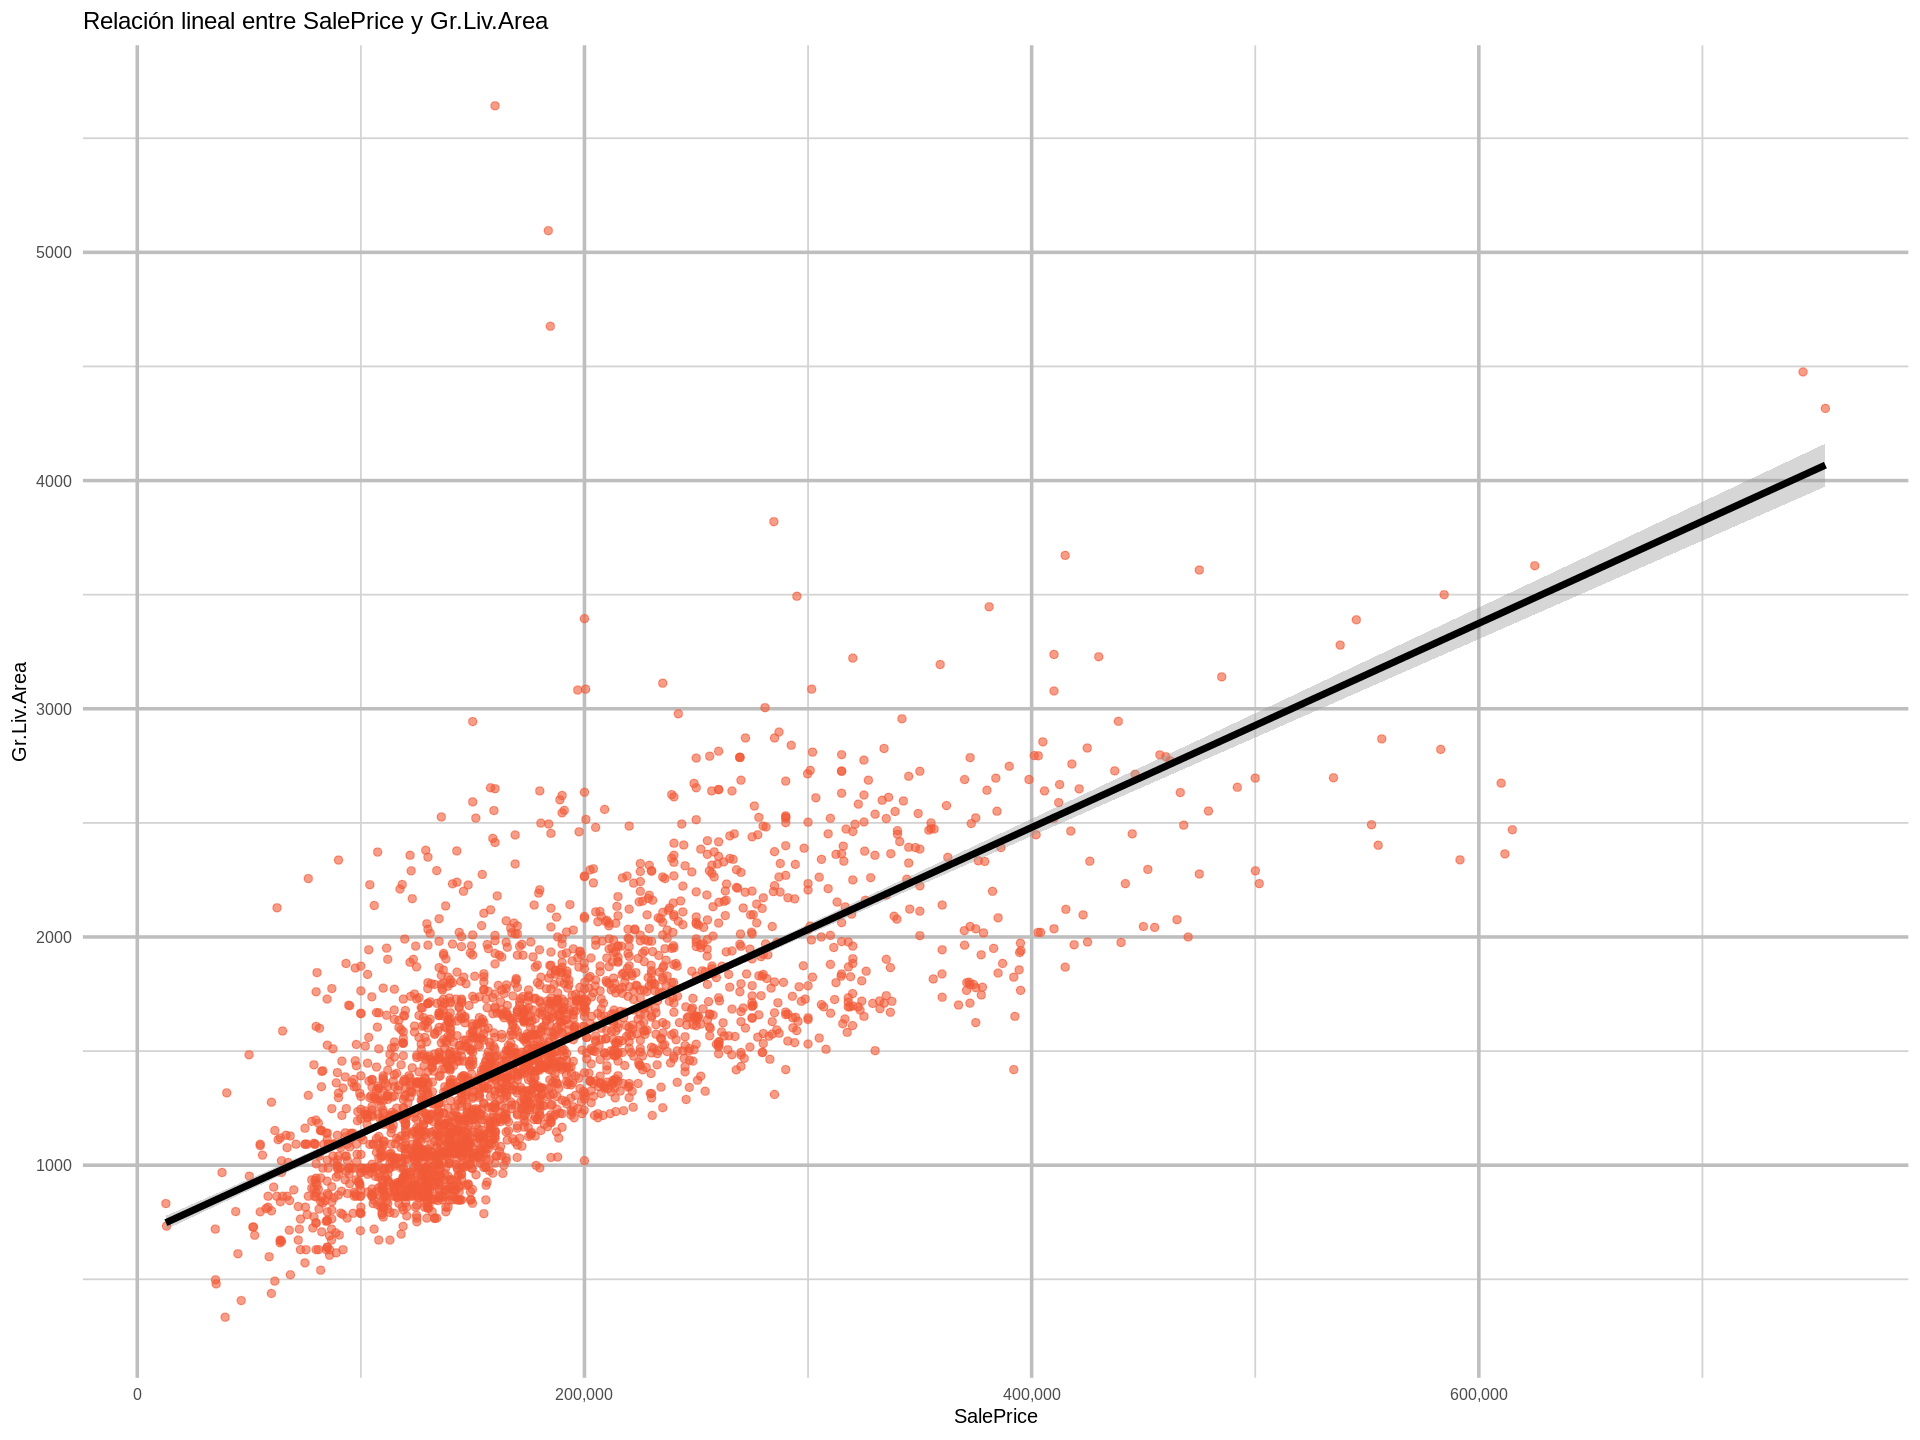

In [33]:
# Supongamos que df es tu dataframe
ggplot(df, aes(SalePrice, Gr.Liv.Area)) +
  geom_point(size = 2, color = "#F25A38", alpha = 0.6) +
  theme_minimal(base_size = 14) +  # Ajusta el tamaño de los títulos
  geom_smooth(method = lm, color = "black", size = 2) +
  scale_x_continuous(labels = scales::comma_format()) +  # Utiliza scales::comma_format()
  labs(title = "Relación lineal entre SalePrice y Gr.Liv.Area",
       x = "SalePrice",
       y = "Gr.Liv.Area") +
  theme(
    text = element_text(size = 12),  # Ajusta el tamaño de texto general
    axis.title.x = element_text(size = 12),  # Ajusta el tamaño del título del eje x
    axis.title.y = element_text(size = 12),  # Ajusta el tamaño del título del eje y
    panel.grid.major = element_line(size = 1, color = "gray"),  # Ajusta las líneas de la cuadrícula
    panel.grid.minor = element_line(size = 0.5, color = "lightgray")  # Ajusta las líneas de la cuadrícula
  )


#Matriz de correlación (variables con mayor coorelación)

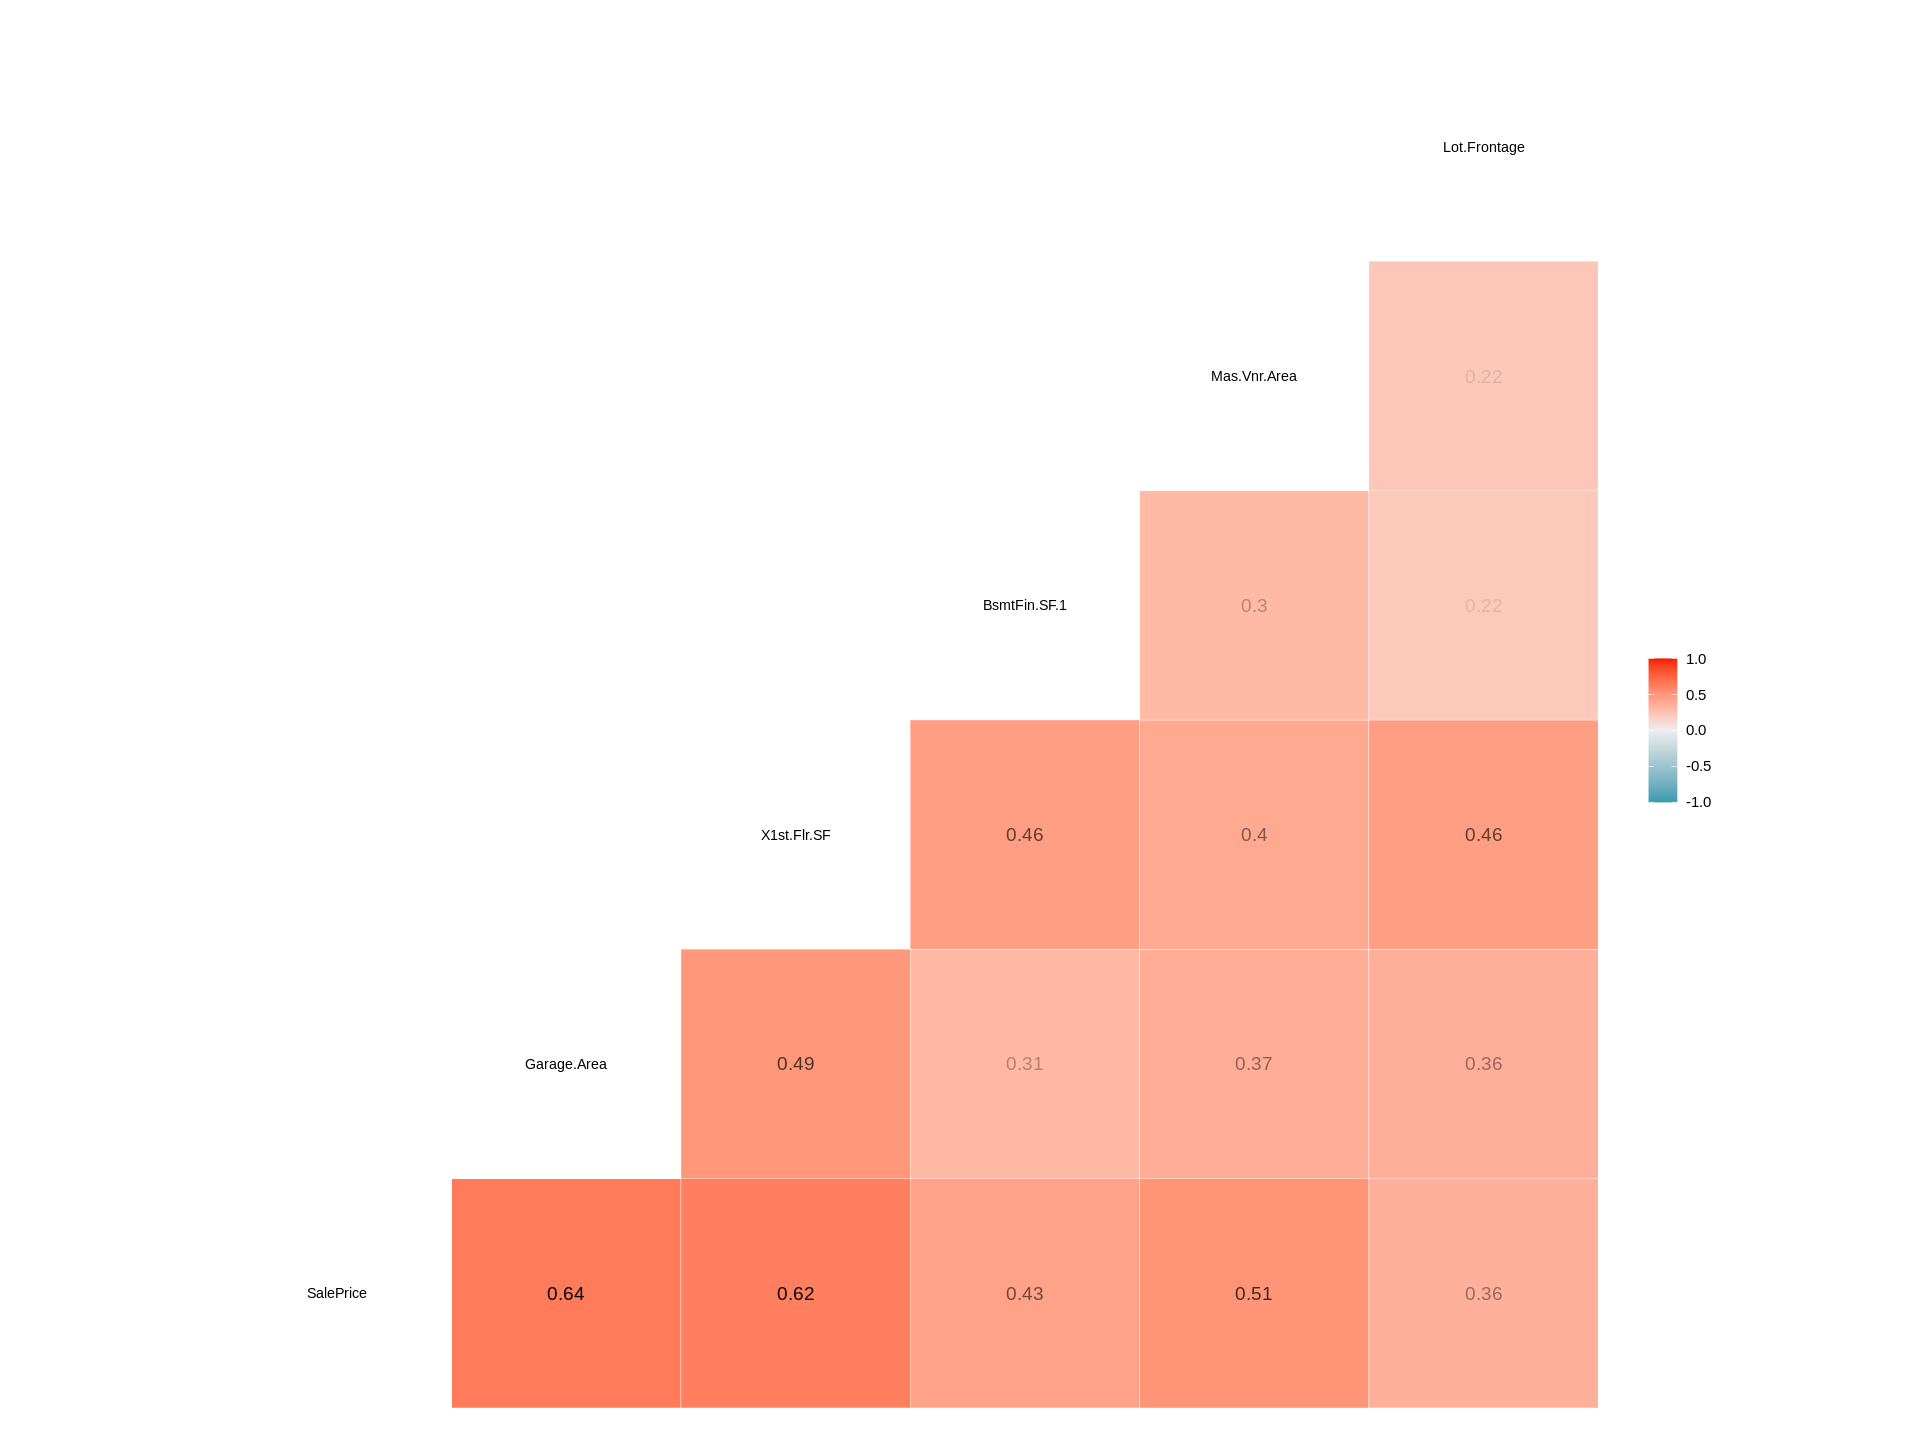

In [34]:
#Selecting variables
df1 = numeric %>% select(SalePrice, Garage.Area, X1st.Flr.SF, BsmtFin.SF.1, Mas.Vnr.Area, Lot.Frontage)

# Let's see the correlation matrix
ggcorr(df1, size = 3, label = TRUE, label_size = 4, label_round = 2, label_alpha = TRUE)

#

In [35]:
# Función para calcular correlaciones y visualizarlas
corr_simple <- function(data = df, sig = 0.5) {
  # Convertir los datos a numéricos para calcular correlaciones
  # Convertir primero a factor para mantener la integridad de los datos: cada valor se convertirá en un número en lugar de convertirse en NA
  df_cor <- data %>% mutate_if(is.character, as.factor)
  df_cor <- df_cor %>% mutate_if(is.factor, as.numeric)

  # Calcular correlaciones y eliminar las no significativas
  corr <- cor(df_cor)

  # Preparar para eliminar duplicados y correlaciones de 1
  corr[lower.tri(corr, diag = TRUE)] <- NA

  # Eliminar correlaciones perfectas
  corr[corr == 1] <- NA

  # Convertir a un marco de datos de 3 columnas
  corr <- as.data.frame(as.table(corr))

  # Eliminar los valores NA
  corr <- na.omit(corr)

  # Seleccionar valores significativos
  corr <- subset(corr, abs(Freq) > sig)

  # Ordenar por correlación más alta
  corr <- corr[order(-abs(corr$Freq)),]

  # Imprimir la tabla de correlaciones
  print(corr)

  # Convertir corr de nuevo a matriz para trazar con corrplot
  mtx_corr <- reshape2::acast(corr, Var1 ~ Var2, value.var = "Freq")

  # Visualizar las correlaciones con corrplot
  corrplot(mtx_corr, is.corr = FALSE, tl.col = "black", na.label = " ")
}

# Llamar a la función para calcular y visualizar correlaciones
corr_simple()


               Var1           Var2       Freq
6397          Order        Yr.Sold -0.9759929
2075   Exterior.1st   Exterior.2nd  0.8654165
4558    Gr.Liv.Area  TotRms.AbvGrd  0.8077721
6661   Overall.Qual      SalePrice  0.7992618
1315    MS.SubClass      Bldg.Type  0.7435622
6690    Gr.Liv.Area      SalePrice  0.7067799
4563  Bedroom.AbvGr  TotRms.AbvGrd  0.6726472
3900    X2nd.Flr.SF    Gr.Liv.Area  0.6552512
4457     Exter.Qual   Kitchen.Qual  0.6535235
6671     Exter.Qual      SalePrice -0.6476163
2481     Year.Built     Foundation  0.6366324
2315   Overall.Qual     Exter.Qual -0.6331484
4148    Gr.Liv.Area      Full.Bath  0.6303208
6687    X1st.Flr.SF      SalePrice  0.6216761
6697   Kitchen.Qual      SalePrice -0.6136888
1743     Year.Built Year.Remod.Add  0.6120953
4228    X2nd.Flr.SF      Half.Bath  0.6116337
1659   Overall.Qual     Year.Built  0.5970272
4447   Overall.Qual   Kitchen.Qual -0.5896450
4556    X2nd.Flr.SF  TotRms.AbvGrd  0.5852137
3873   Overall.Qual    Gr.Liv.Area

ERROR: ignored

#Analisis Exploratorio con datos procesados

## DataFrame procesado

In [36]:
# URL del archivo CSV
processed_data <- "https://raw.githubusercontent.com/FerMarz/ames-housing-2023/main/data/AmesHousing_processed_data.csv"

# Leer el archivo CSV
df <- read.csv(processed_data)

# Mostrando las primeras filas
head(df)

,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,⋯,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,sale_condition,sale_price
,<dbl>,<int>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>
1,-0.87700484,5,2.4885922,2.74438073,1,2,0,3,0,0,⋯,-0.06303105,4,4,5,-0.08942228,-0.44805744,1.678499,9,4,215000
2,-0.87700484,4,0.6673554,0.18709726,1,2,3,3,0,4,⋯,-0.06303105,4,2,5,-0.08942228,-0.07960156,1.678499,9,4,105000
3,-0.87700484,5,0.6972118,0.52281370,1,2,0,3,0,0,⋯,-0.06303105,4,4,1,21.98572514,-0.07960156,1.678499,9,4,172000
4,-0.87700484,5,1.0554879,0.12845795,1,2,3,3,0,0,⋯,-0.06303105,4,4,5,-0.08942228,-0.81651332,1.678499,9,4,244000
5,0.06128506,5,0.4882174,0.46734751,1,2,0,3,0,4,⋯,-0.06303105,4,2,5,-0.08942228,-1.18496920,1.678499,9,4,189900
6,0.06128506,5,0.6076428,-0.02156732,1,2,0,3,0,4,⋯,-0.06303105,4,4,5,-0.08942228,-0.07960156,1.678499,9,4,195500


#Matriz de correlación con datos procesados

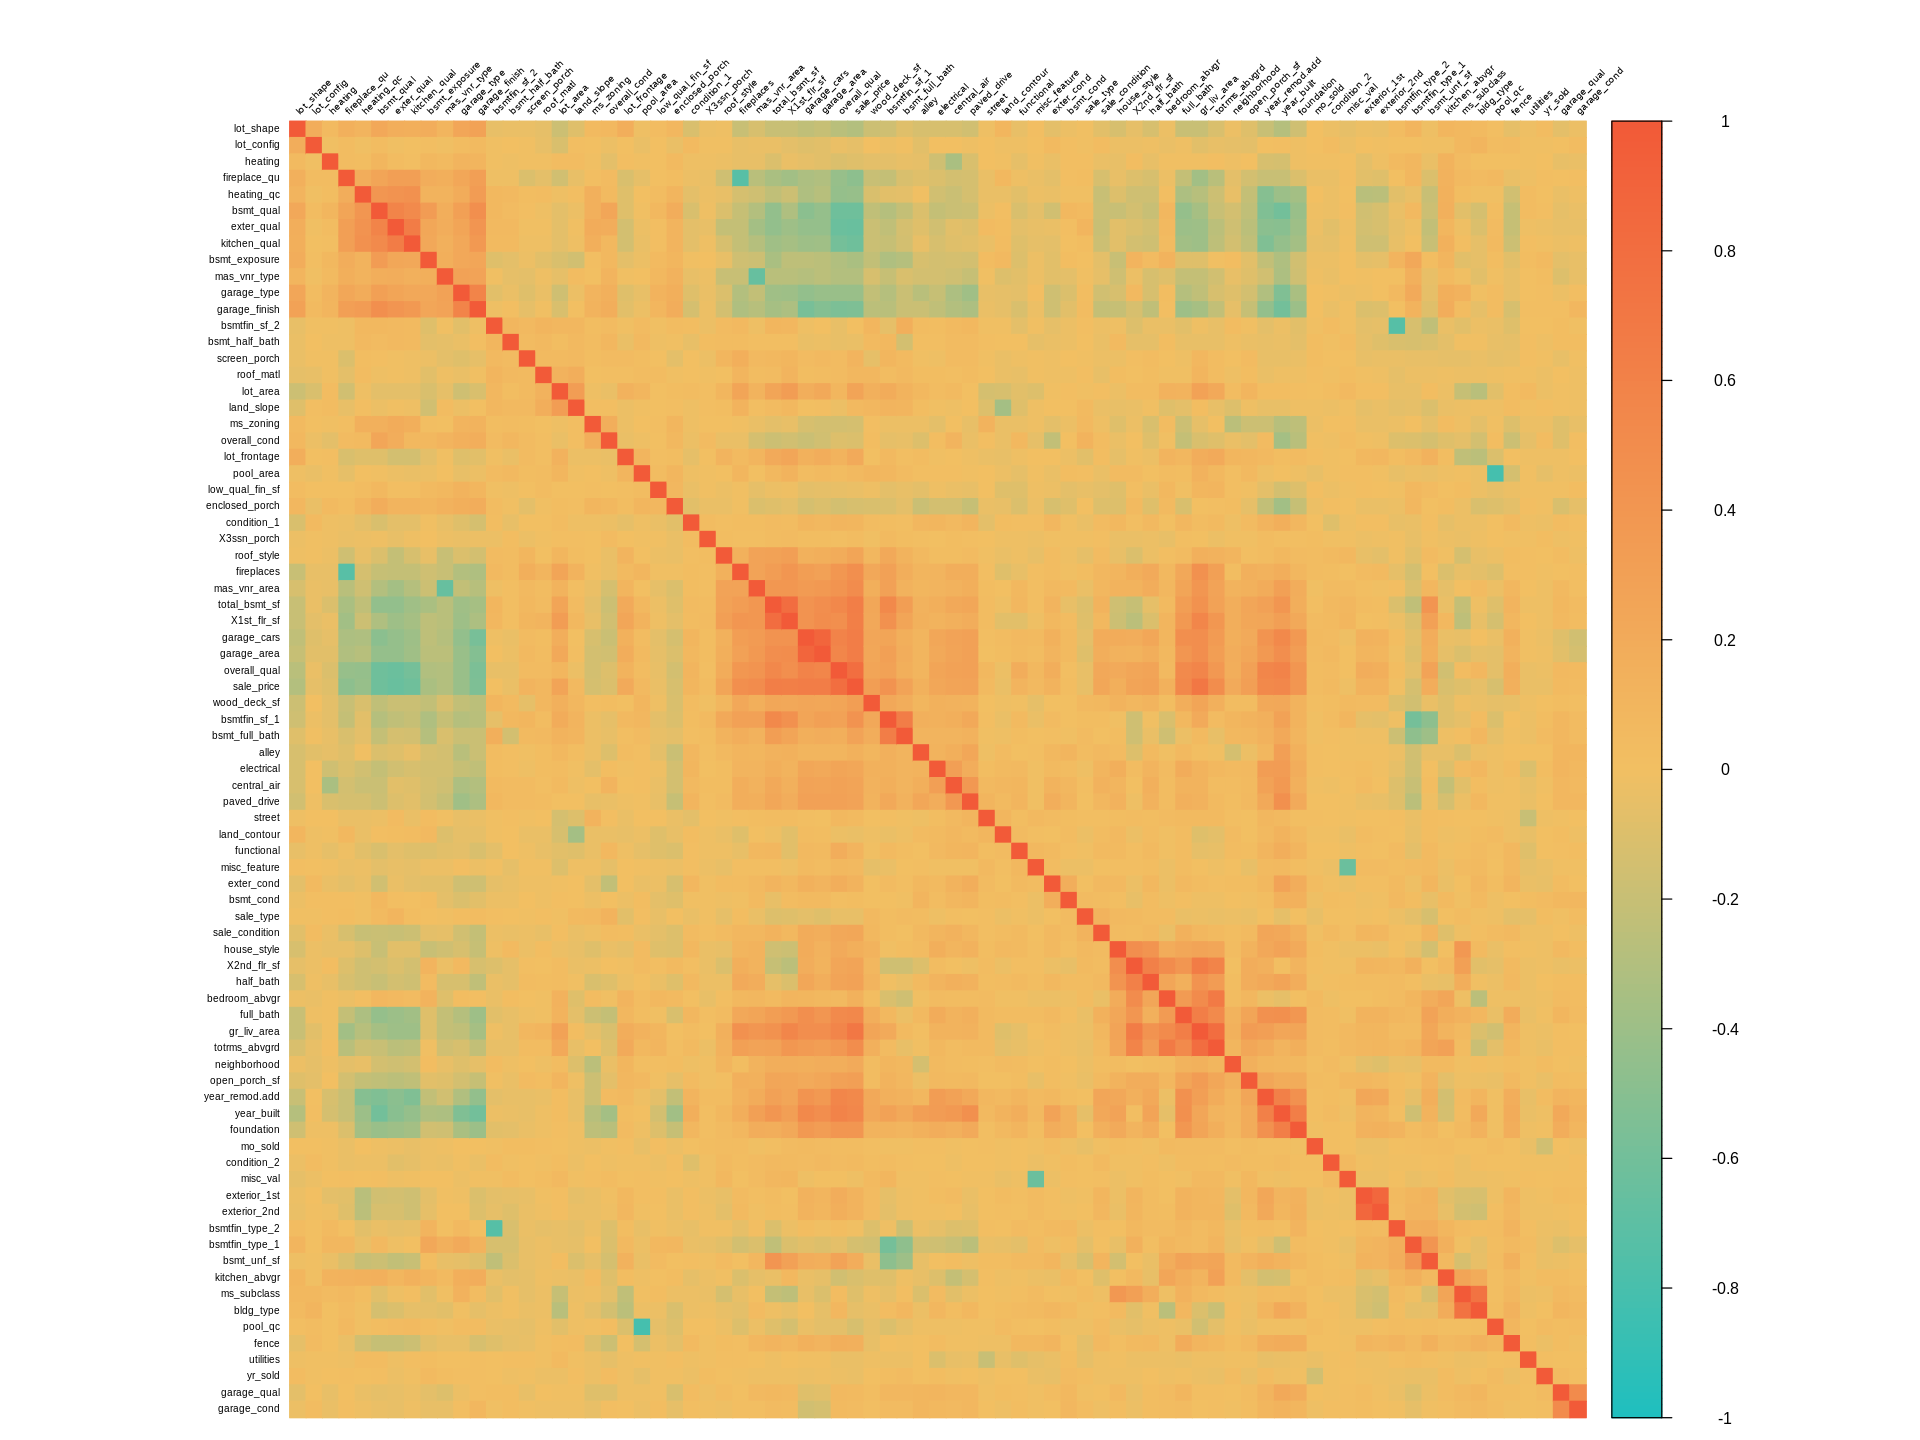

In [ ]:
# Solo variables numéricas
numeric <- df %>% select(where(is.numeric))

# Calcular la matriz de correlación
cor_matrix <- cor(numeric)

# Crear una paleta de colores personalizada
colores_personalizados <- colorRampPalette(c("#1FBFBF", "#F2C063", "#F25A38"))

# Generar el gráfico de correlación con la paleta de colores personalizada
corrplot(cor_matrix,
         method = "color",
         order = "hclust",
         hclust.method = "complete",
         tl.cex = 0.5, # Tamaño del texto
         tl.col = "black",
         tl.srt = 45, # Inclinación del texto superior
         col = colores_personalizados(200)) # Partición del gradiente de color

##Variables con fuerte correlación

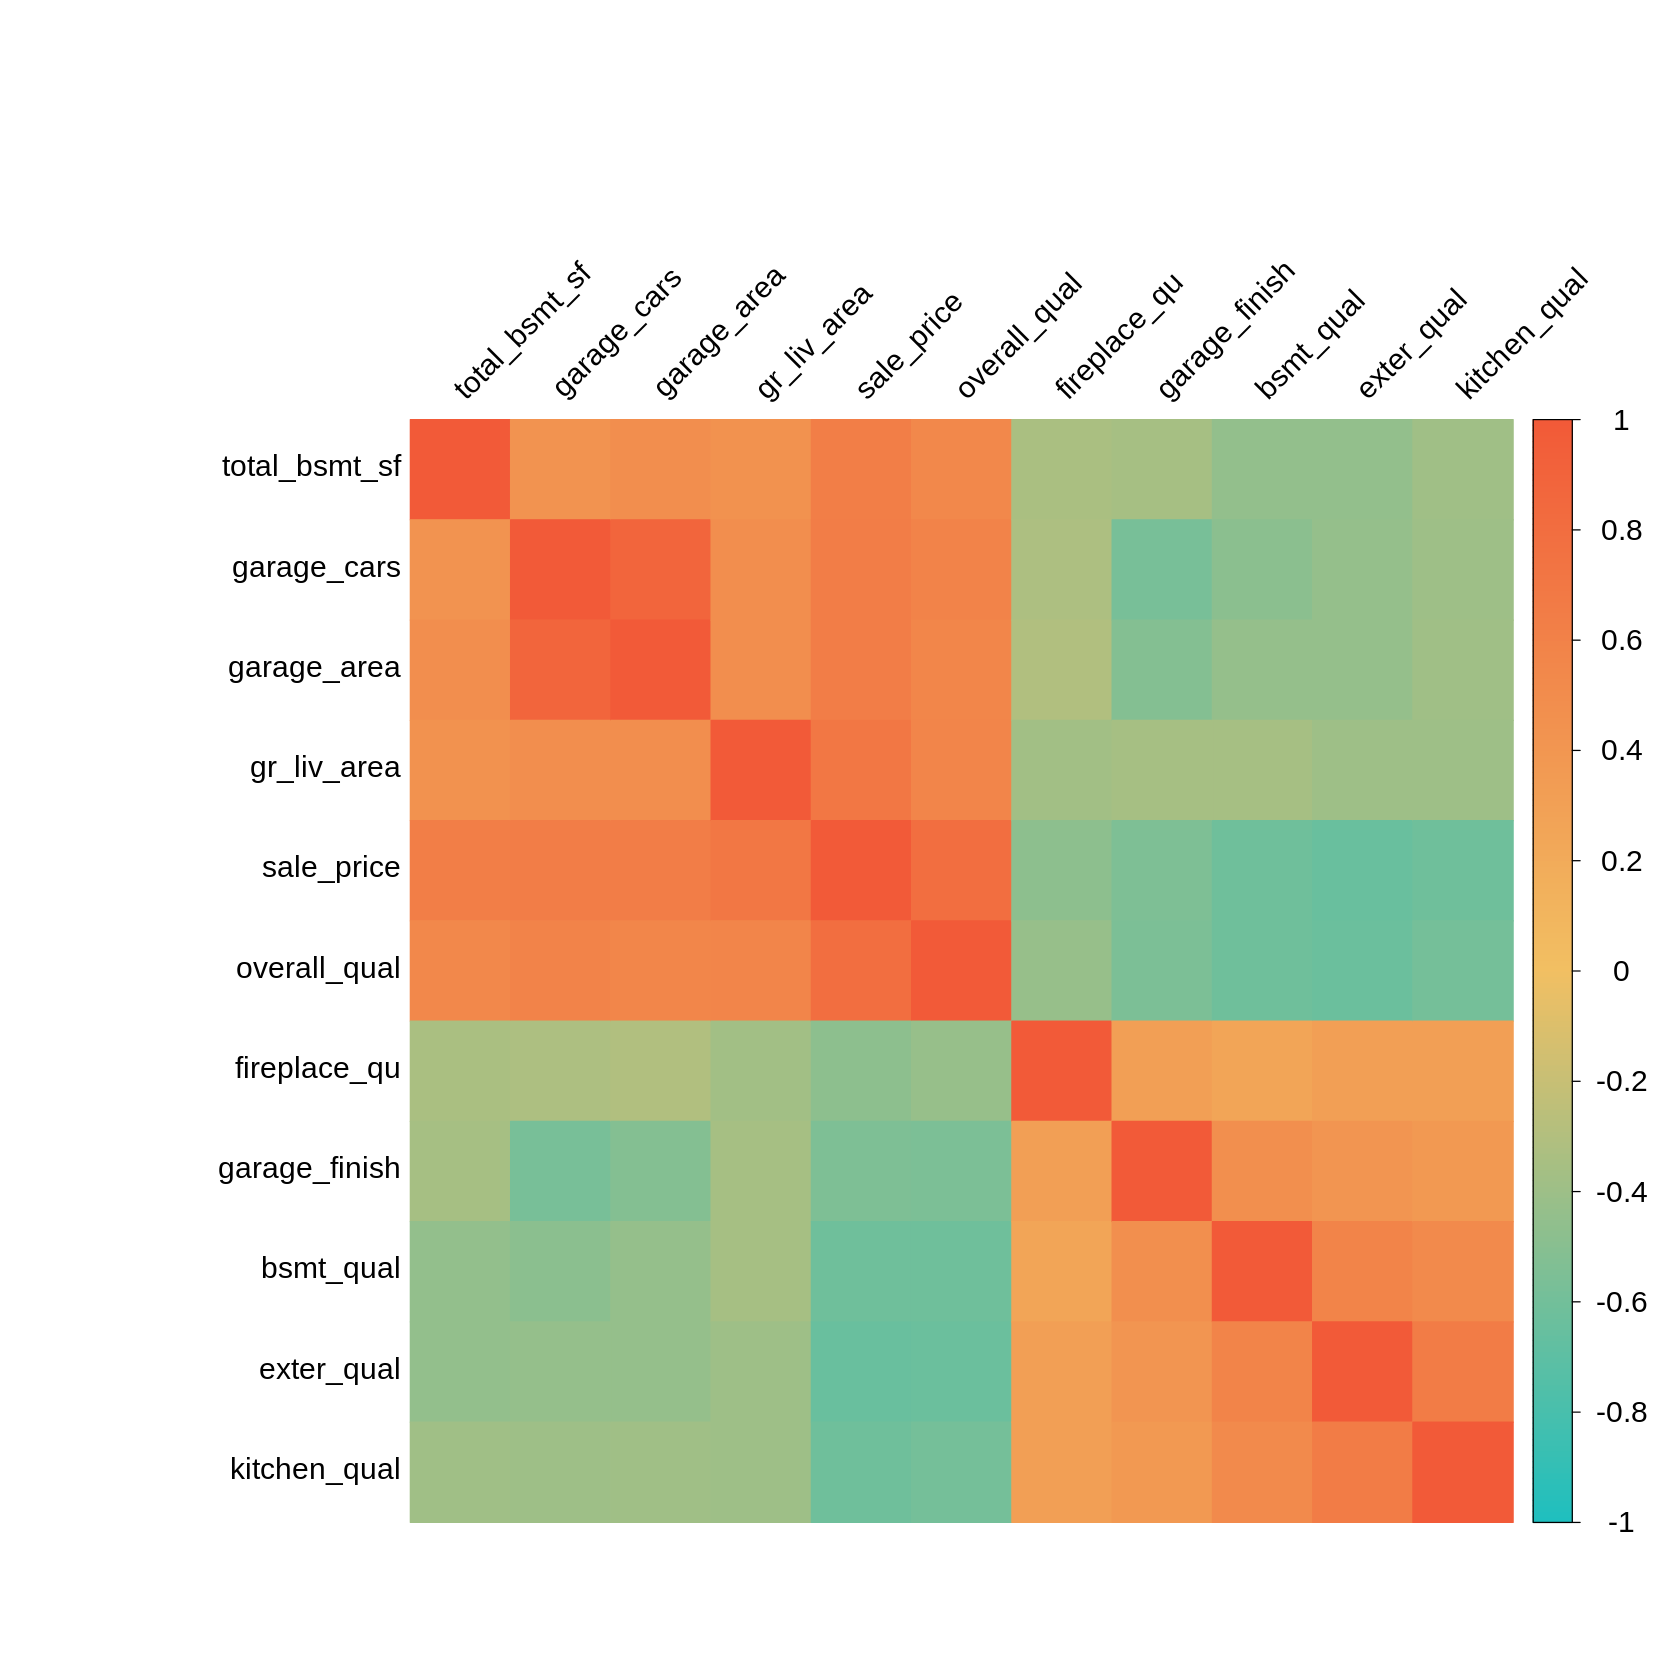

In [ ]:
# Selección de variables
new_df = numeric %>% select(sale_price, overall_qual, gr_liv_area, garage_cars, garage_area, total_bsmt_sf, exter_qual, bsmt_qual, kitchen_qual, garage_finish, fireplace_qu)
# Calcular la matriz de correlación
cor_matrix <- cor(new_df)

options(repr.plot.width = 14, repr.plot.height = 14)
# Generar el gráfico de correlación con la paleta de colores personalizada
corrplot(cor_matrix,
         method = "color",
         order = "hclust",
         hclust.method = "complete",
         tl.cex = 1.5, # Tamaño del texto de las etiquetas
         tl.col = "black",
         tl.srt = 45, # Inclinación del texto superior
         col = colores_personalizados(200), # Partición del gradiente de color
         cl.cex = 1.5) # Aumentar el tamaño del texto de la barra de colores
# mtext("Variables con fuerte correlación", at=6.5, line=-5, cex=4)